In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [26]:
data = pd.read_csv("customer_data.csv")

In [27]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
0,1,1991,PhD,Together,148884.56,1,1,2017-03-26,78,0,...,1,0,0,0,9,11,7,2,46,1800
1,2,1954,Graduation,Widow,167658.20,1,1,2018-07-12,87,0,...,0,0,1,0,12,3,1,11,18,3221
2,3,2000,2n Cycle,Widow,149392.85,2,2,2015-04-11,88,0,...,1,0,0,0,9,11,14,14,19,4203
3,4,1960,2n Cycle,Married,32855.81,0,2,2011-09-09,0,0,...,0,0,0,0,1,12,14,19,42,3062
4,5,1963,PhD,Married,151918.44,0,1,2018-05-31,6,0,...,0,1,0,0,2,7,4,7,6,3478


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1000 non-null   int64  
 1   Year_Birth           1000 non-null   int64  
 2   Education            1000 non-null   object 
 3   Marital_Status       1000 non-null   object 
 4   Income               1000 non-null   float64
 5   Kidhome              1000 non-null   int64  
 6   Teenhome             1000 non-null   int64  
 7   Dt_Customer          1000 non-null   object 
 8   Recency              1000 non-null   int64  
 9   Complain             1000 non-null   int64  
 10  MntWines             1000 non-null   int64  
 11  MntFruits            1000 non-null   int64  
 12  MntMeatProducts      1000 non-null   int64  
 13  MntFishProducts      1000 non-null   int64  
 14  MntSweetProducts     1000 non-null   int64  
 15  MntGoldProds         1000 non-null   in

In [29]:
 data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
Complain               0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
AcceptedCmp1           0
AcceptedCmp2           0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
Response               0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Z_CostContact          0
Z_Revenue              0
dtype: int64

In [30]:
data.duplicated().sum()

np.int64(0)

In [31]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Complain', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue'],
      dtype='object')

In [32]:
numeric_cols = data.select_dtypes(include='number')
numeric_cols.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'Complain', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Z_CostContact', 'Z_Revenue'],
      dtype='object')

In [33]:
# Select numerical columns for outlier detection
new_numeric_cols=data[[
    "Income", "Kidhome", "Teenhome", "Recency", "MntWines", "MntFruits",
    "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds",
    "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases",
    "NumStorePurchases", "NumWebVisitsMonth", "Z_CostContact", "Z_Revenue"]]

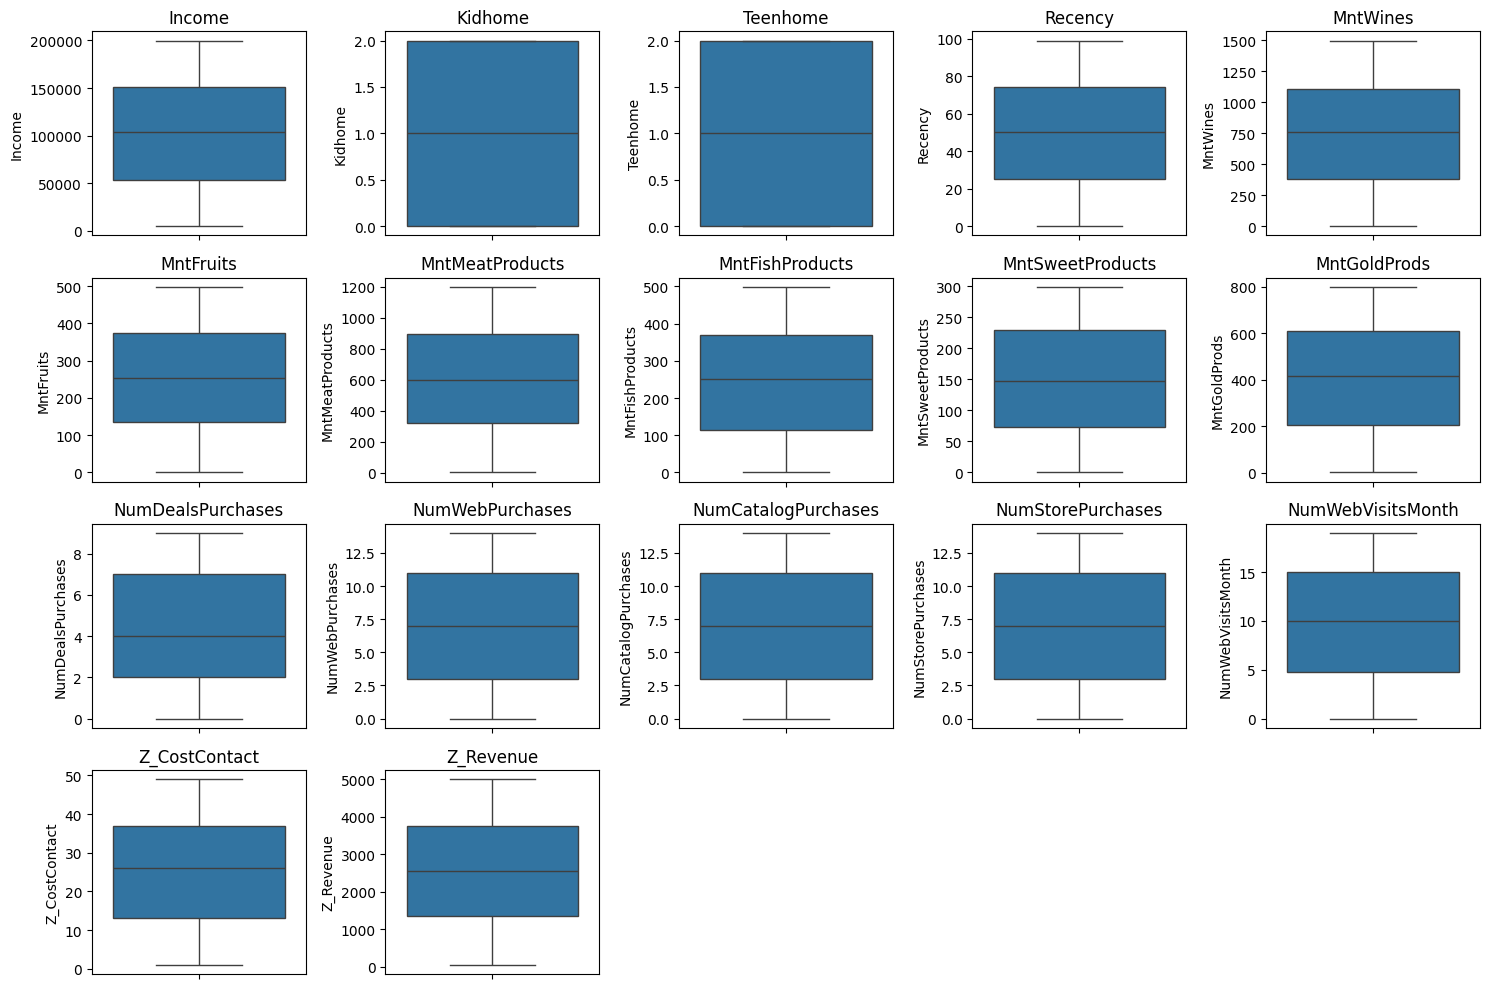

In [34]:
# Plot boxplots for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(new_numeric_cols,1):
    plt.subplot(4, 5, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.savefig(" boxplots for numerical columns.png", dpi=300)
plt.show()

In [35]:
from datetime import datetime

In [36]:
# Convert 'Dt_Customer' to datetime format
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])

In [37]:
# Feature 1: Age
current_year = datetime.now().year
data["Age"] = current_year - data["Year_Birth"]

In [38]:
# Feature 2: Customer Tenure (in days)
data["Customer_Tenure"] = (datetime.now() - data["Dt_Customer"]).dt.days
data["Tenure_Years"] = data["Customer_Tenure"] / 365
data["Customer_Tenure"] = data["Customer_Tenure"].astype(int)

In [39]:
# Feature 3: Total Spending (Sum of all product spending)
spending_cols = ["MntWines", "MntFruits", "MntMeatProducts","MntFishProducts", "MntSweetProducts", "MntGoldProds"]
data["Total_Spending"] = data[spending_cols].sum(axis=1)

In [40]:
# Feature 4: Purchase Frequency (Sum of all purchase counts)
purchase_cols = ["NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]
data["Purchase_Frequency"] = data[purchase_cols].sum(axis=1)

In [41]:
# Feature 5: Profit Margin (Assumed 30% of Total Spending)
data["Profit_Margin"] = data["Total_Spending"] * 0.3

In [42]:
# Feature 6: Customer Lifetime Value (CLV) Estimation
# CLV = (Average Profit Margin per purchase) × (Purchase Frequency) × (Customer Tenure)
data["CLV"] = data["Profit_Margin"] * data["Purchase_Frequency"] * data["Tenure_Years"]
data["CLV"] = data["CLV"].round(2)
data["CLV"]

0      158349.06
1       83766.96
2      253202.75
3      297217.81
4       74220.68
         ...    
995    122691.17
996    351543.25
997     59979.14
998    220378.29
999    132938.84
Name: CLV, Length: 1000, dtype: float64

In [43]:
clv_dataset=data[["Age", "Tenure_Years", "Total_Spending", "Purchase_Frequency", "Profit_Margin", "CLV"]]

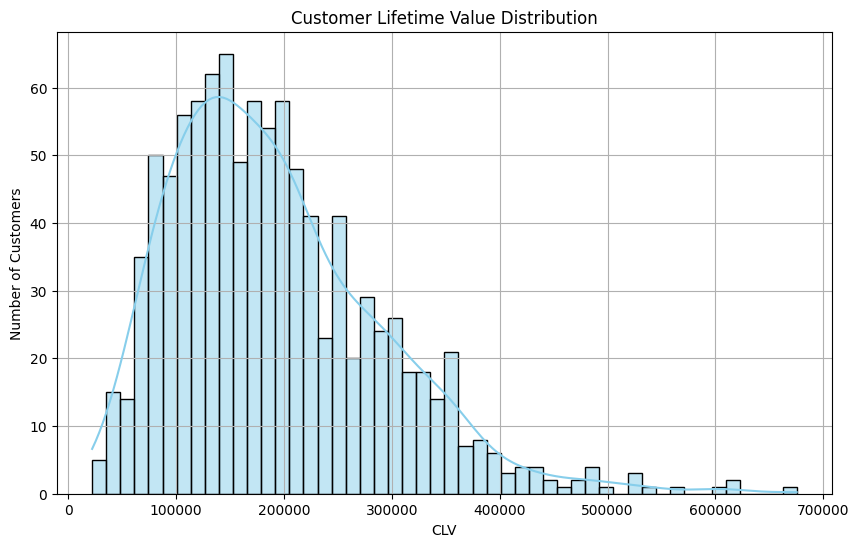

In [44]:
# CLV Distribution Plot
plt.figure(figsize=(10,6))
sns.histplot(data["CLV"], bins=50, kde=True, color='skyblue')
plt.title("Customer Lifetime Value Distribution")
plt.xlabel("CLV")
plt.ylabel("Number of Customers")
plt.savefig("CLV Distribution Plot.png", dpi=300)
plt.grid(True)
plt.show()


In [45]:
# Segment customers into 3 groups based on CLV
data["CLV_Segment"] = pd.qcut(data["CLV"], q=3, labels=["Low", "Medium", "High"])

# Check how many customers fall in each segment
segment_counts = data["CLV_Segment"].value_counts()
segment_counts

CLV_Segment
Low       334
High      334
Medium    332
Name: count, dtype: int64

In [46]:
# Group by CLV segment and take average of key features
segment_summary = data.groupby("CLV_Segment")[["Age", "Tenure_Years", "Total_Spending", "Purchase_Frequency","Profit_Margin", "CLV"]].mean().round(2)
segment_summary


C:\Users\DELL\AppData\Local\Temp\ipykernel_21148\1896595114.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_summary = data.groupby("CLV_Segment")[["Age", "Tenure_Years", "Total_Spending", "Purchase_Frequency","Profit_Margin", "CLV"]].mean().round(2)


,Age,Tenure_Years,Total_Spending,Purchase_Frequency,Profit_Margin,CLV
CLV_Segment,,,,,,
Low,54.94,8.57,2075.72,20.26,622.72,97361.35
Medium,52.47,10.21,2406.93,25.98,722.08,175322.06
High,52.11,12.39,2759.40,30.43,827.82,302919.46


C:\Users\DELL\AppData\Local\Temp\ipykernel_21148\3758462270.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="CLV_Segment", palette="viridis", order=["Low", "Medium", "High"])


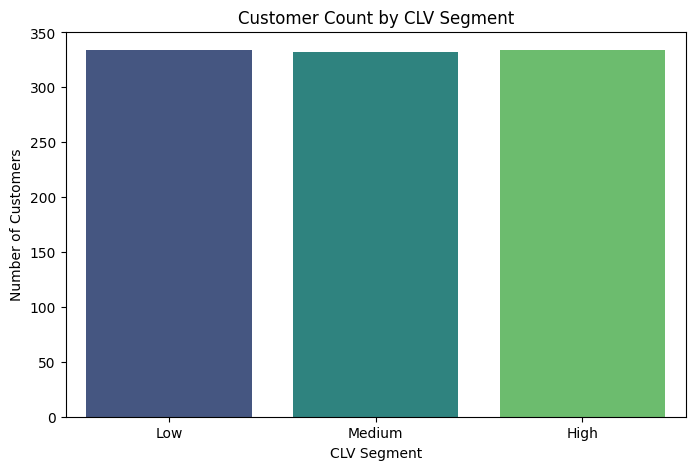

In [47]:
# Plotting CLV segments
plt.figure(figsize=(8,5))
sns.countplot(data=data, x="CLV_Segment", palette="viridis", order=["Low", "Medium", "High"])
plt.title("Customer Count by CLV Segment")
plt.xlabel("CLV Segment")
plt.ylabel("Number of Customers")
plt.savefig("CLV segments.png", dpi=300)
plt.show()


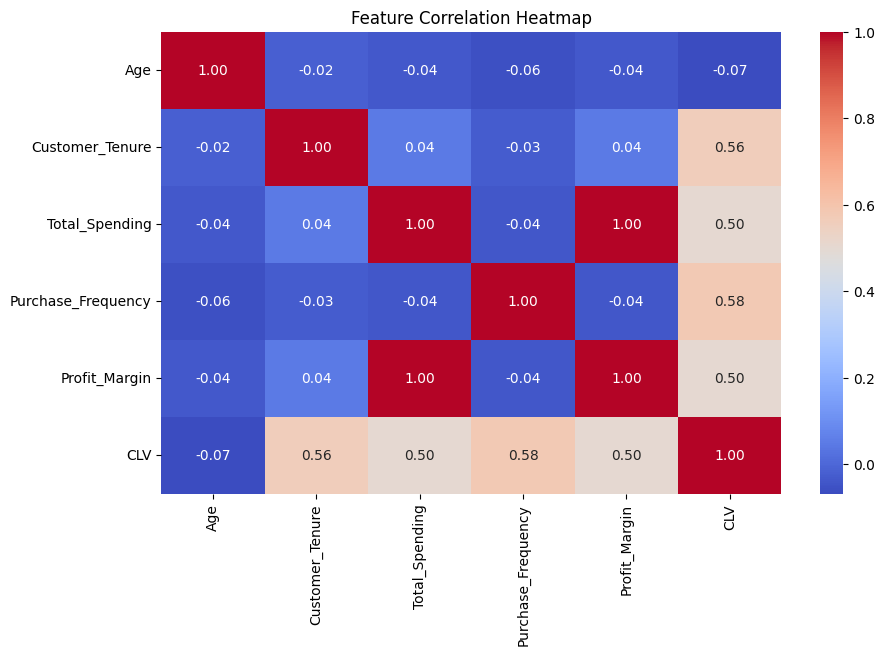

In [48]:
# 2️⃣ Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data[["Age", "Customer_Tenure", "Total_Spending", "Purchase_Frequency", "Profit_Margin", "CLV"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.savefig("heatmap.png", dpi=300)
plt.show()


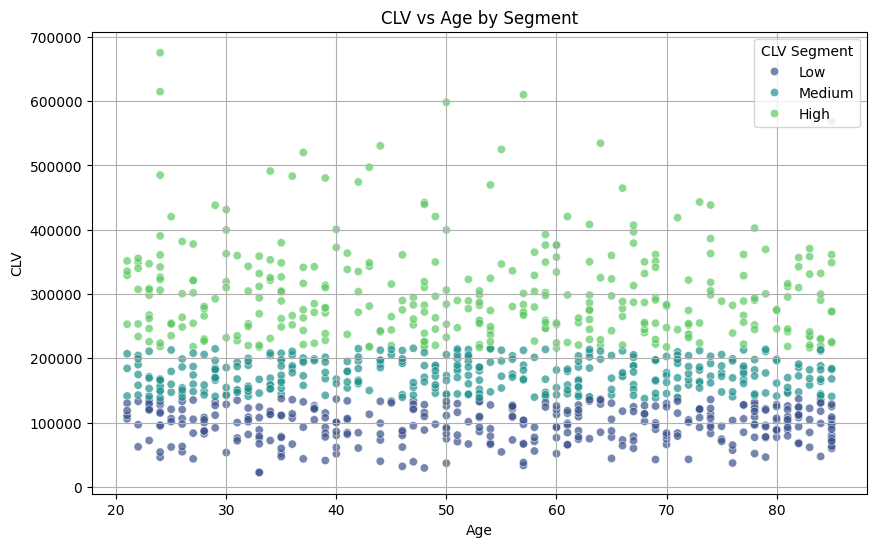

In [24]:
# 1️⃣ CLV vs Age
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Age", y="CLV", hue="CLV_Segment", palette="viridis", alpha=0.7)
plt.title("CLV vs Age by Segment")
plt.xlabel("Age")
plt.ylabel("CLV")
plt.legend(title="CLV Segment")
plt.grid(True)
plt.savefig("Age_vs_clv.png", dpi=300)
plt.show()

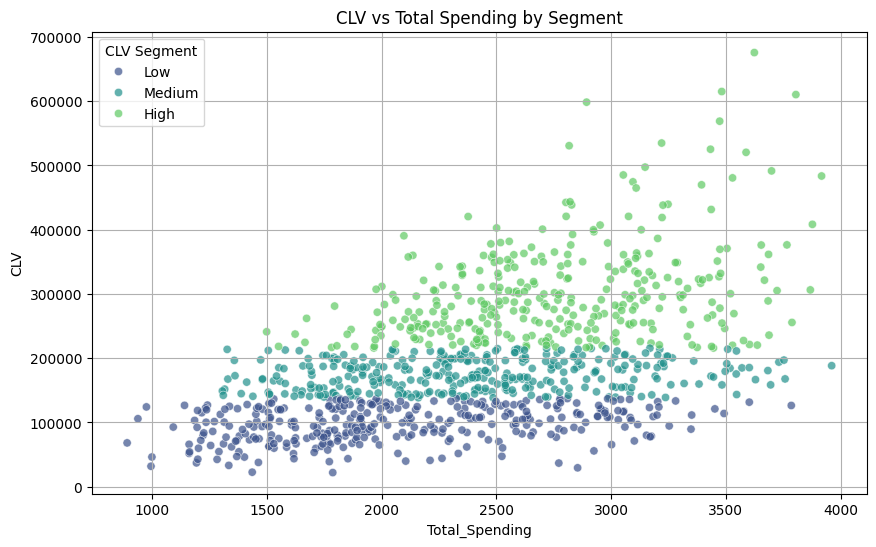

In [23]:
# 2️⃣ CLV vs Total Spending
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Total_Spending", y="CLV", hue="CLV_Segment", palette="viridis", alpha=0.7)
plt.title("CLV vs Total Spending by Segment")
plt.xlabel("Total_Spending")
plt.ylabel("CLV")
plt.legend(title="CLV Segment")
plt.grid(True)
plt.savefig("purchase_freq_vs_clv.png", dpi=300)
plt.show()


In [21]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler


In [22]:
encoded = pd.get_dummies(data, drop_first=True)
encoded.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'Complain', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Z_CostContact', 'Z_Revenue', 'Age', 'Customer_Tenure', 'Tenure_Years',
       'Total_Spending', 'Purchase_Frequency', 'Profit_Margin', 'CLV',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow', 'CLV_Segment_Medium',
       'CLV_Segment_High'],
      dtype='object')

In [52]:
# Split X and y
X = encoded[['ID', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntGoldProds',
       'NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp5', 'Response',
       'NumCatalogPurchases', 'Customer_Tenure', 'Tenure_Years',
       'Total_Spending', 'Purchase_Frequency', 'Profit_Margin',
       'Education_Master', 'Marital_Status_Married', 'Marital_Status_Widow',
       'CLV_Segment_Medium', 'CLV_Segment_High']]
y = encoded[["CLV"]]

In [53]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [54]:
# LassoCV for feature selection
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_scaled, y.values.ravel())

LassoCV(cv=5, random_state=42)

In [55]:
# Selected features
selected_features = X.columns[lasso.coef_ != 0]
selected_features

Index(['ID', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntGoldProds',
       'NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp5', 'Response',
       'NumCatalogPurchases', 'Customer_Tenure', 'Tenure_Years',
       'Total_Spending', 'Purchase_Frequency', 'Profit_Margin',
       'Education_Master', 'Marital_Status_Married', 'Marital_Status_Widow',
       'CLV_Segment_Medium', 'CLV_Segment_High'],
      dtype='object')

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [57]:
 #Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y.values.ravel(), test_size=0.2, random_state=42)

In [62]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2 = r2_score(y_test, y_pred_xgb)

print(" XGBoost Evaluation Metrics:")
print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R² Score:", round(r2*100, 2))


📊 XGBoost Evaluation Metrics:
MAE: 14348.72
RMSE: 22934.33
R² Score: 94.28


In [63]:
import joblib

# Save
joblib.dump(xgb_model, 'xgb_model.pkl')
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']